# Eduardo Abenza Severá and Jesús González Ferrer. Task 2

As an example of SVM and PCA in action, we are solving the facial recognition problem. We are using the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3000 pixels each. A fetcher for the dataset is built into Scikit-Learn:

In [167]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names.shape)
print(faces.images.shape)
print(faces.data.shape)
print(faces.target)

(8,)
(1348, 62, 47)
(1348, 2914)
[1 3 3 ... 7 3 5]


## Exploring data

Let's explore this database. We have stored a bunch of labelled photos in **faces** object. Within this object, we find the following items:

- **DESCR**: it is a string containing a 4280-characters description of this dataset.

In [168]:
print("The length of DESCR string is: " + str(len(faces.DESCR)))
print("Below is the complete string:\n\n" + faces.DESCR)

The length of DESCR string is: 4280
Below is the complete string:

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for F

- **target_names** contains a numpy array with 8 elements:
    - Ariel Sharon
    - Colin Powell
    - Donald Rumsfeld
    - George W Bush
    - Gerhard Schroeder
    - Hugo Chavez
    - Junichiro Koizumi
    - Tony Blair
   
        - *These are the names of famous people, whose faces are present in this database.*
        

- **target** contains a numeric numpy array with 1277 elements, one for each image in the database, and these ids associate each photo with its corresponding name.

- **images** is a 1277x62x47 3D numpy array which contains 1277 images formed by 62x47 pixels (2914 total).
- **data** contains the same information than the previous array but in a 2D manner: the two pixels dimensions have been collapsed. This is the data we should use for our model.

In [183]:
print(faces.images[0])
print("")
print(faces.data[0])

[[138.         135.66667    127.666664   ...  69.          68.333336
   67.333336  ]
 [146.         139.33333    125.         ...  68.333336    67.666664
   67.333336  ]
 [150.         138.33333    124.333336   ...  68.333336    67.666664
   66.666664  ]
 ...
 [153.         174.         110.666664   ...   1.6666666    0.6666667
    0.6666667 ]
 [122.         193.         167.33333    ...   1.3333334    1.6666666
    1.3333334 ]
 [ 88.         177.33333    206.         ...   1.6666666    1.6666666
    0.33333334]]

[138.         135.66667    127.666664   ...   1.6666666    1.6666666
   0.33333334]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


First of all, I think it is convenient to save all the necessary information in some objects.

In [170]:
print("The shape of faces.images item is:", faces.images.shape,
      "\nThese are the number of samples and the height and the width of the images in \npixels,",
      "in that order.")
samples = faces.images.shape[0] # Length of images in our original array
height = faces.images.shape[1] # Number of pixels vertically in each image
width = faces.images.shape[2] # Number of pixels horizontally in each image
print("We have stored these numbers in samples, height and width objects.\n")

features = height * width # Number of pixels in each image
print("The number of features is the number of pixels in each image.",
      "\nWe have stored this integer in an object called features.\n")

X = faces.data # 2D array with the features of all images
print("The data we are using to fit our model and make further predictions is faces.data,",
      "\nwhich from now on is called X.\n")

y = faces.target # 1D array with the labels we use to train our model and that we want to predict
label_names = faces.target_names # 1D array which contains the value (name) of each number in y
print("The labels we are using to train our model and which we want to predict are now",
      "\nstored within an object called y, and their names are called label_names.")

The shape of faces.images item is: (1348, 62, 47) 
These are the number of samples and the height and the width of the images in 
pixels, in that order.
We have stored these numbers in samples, height and width objects.

The number of features is the number of pixels in each image. 
We have stored this integer in an object called features.

The data we are using to fit our model and make further predictions is faces.data, 
which from now on is called X.

The labels we are using to train our model and which we want to predict are now 
stored within an object called y, and their names are called label_names.


## Question 1

- Try to plot the faces from faces.images matrix and faces.target_names as labels. TIP: use subplots and imshow functions from matplotlib

We have constructed a 6x19 grid plot with the first 114 faces in the original database and a few objects created in the previous block of code:

Text(0.5, 0.98, 'Some of the famous people faces')

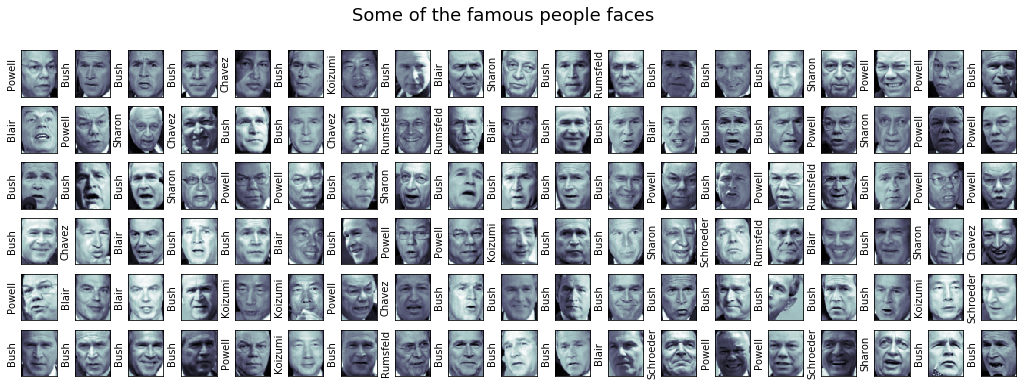

In [171]:
fig, ax = plt.subplots(6, 19, figsize = (18,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(label_names[y[i]].split()[-1], color = "black")
plt.suptitle("Some of the famous people faces", fontsize = 18)

## Question 2

- Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (rbf) and number of PCA components (try 50 and 150). 

We load **make_pipeline** (from **sklearn.pipeline**), **PCA** (**sklearn.decomposition**) and **SVC** (**sklearn.svm**) classes. With the pipe, first we want to reduce the dimensionality of our data (2914 pixels each image is very large) with `Principal Component Analysis` and then we want to use a `Support Vector Classifier` with nonlinear Gaussian kernel.

We are creating two pipes, one with 50 PCA components (**pipe_N50**) and another with 150 PCA components (**pipe_N150**).

With 50 principal components, variance explained is 0.848
With 150 principal components, variance explained is 0.946


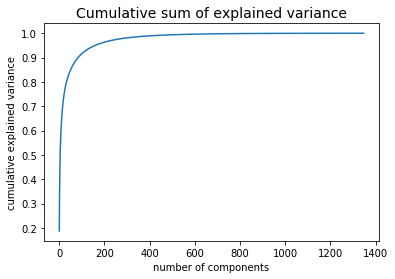

In [172]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', whiten= True).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Cumulative sum of explained variance", fontsize = 14);

print("With 50 principal components, variance explained is %.3f" % sum(pca.explained_variance_ratio_[:50]))
print("With 150 principal components, variance explained is %.3f" % sum(pca.explained_variance_ratio_[:150]))

As we can see, leaving only 150 dimensions the "lost" explained variance is less than 6%, but removing another 100 dimensions the explained variance suffers almost a 10% decrease. We are constructing a pipe with 50 principal components and another one with 150 principal components, and in the last questions we will discard the model with the lowest accuracy.

We are performing our Principal Component Analysis with svd_solver = "randomized", which allows us to use RandomizedPCA. Also, to make the input features less redundant, we are whitening them so as to improve further predictions of our classifier. For the SV Classifier, we are using "ovo" decision function shape, as it is better for multiclass analysis. 

In [173]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 

pipe_N50 = make_pipeline(PCA(n_components = 50, svd_solver='randomized', whiten= True),
                         SVC(kernel='rbf', decision_function_shape = "ovo"))
pipe_N150 = make_pipeline(PCA(n_components = 150, svd_solver='randomized', whiten = True),
                          SVC(kernel='rbf', decision_function_shape = "ovo"))
print("PCA(N)>SVC(kernel='rbf') pipelines have been created.")

PCA(N)>SVC(kernel='rbf') pipelines have been created.


## Question 3

- For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use training_test_split function from sklearn.model_selection

First we are loading **train_test_split** function from **sklearn.model_selection**. This function splits arrays in two parts, whose size depends on the options of this function (such as test_size or train_size). Here, we are using default options: test array is 25% of the original array and rows within array are shuffled.

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print("X array has been splitted into X_train and X_test.",
      "\ny array has been splitted into y_train and y_test.",
      "\n\nRandom state: 1",
      "\nTest arrays contain 25% of the rows of the initial array.",
      "\nBefore the splitting, rows of the original arrays have been shuffled.")

X array has been splitted into X_train and X_test. 
y array has been splitted into y_train and y_test. 

Random state: 1 
Test arrays contain 25% of the rows of the initial array. 
Before the splitting, rows of the original arrays have been shuffled.


## Question 4

- Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use GridSearchCV from _sklearn.model_selection_, use following values for 'svc__C': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters.

We are loading **GridSearchCV** from **sklearn.model_selection**. Then, we create a dictionary with all the C and gamma parameters we are trying for SVC, and we perform GridSearchCV with both pipes.

In [175]:
from sklearn.model_selection import GridSearchCV

parameters = {'svc__gamma':[0.0001, 0.0005, 0.001, 0.005], 
              'svc__C':[1, 5, 10, 50]}

clf_N50 = GridSearchCV(pipe_N50, parameters)
clf_N50 = clf_N50.fit(X_train, y_train)
print("Grid search cross validation has finished (50 PCA components): clf_N50\n")

clf_N150 = GridSearchCV(pipe_N150, parameters)
clf_N150 = clf_N150.fit(X_train, y_train)
print("Grid search cross validation has finished (150 PCA components): clf_N150")

Grid search cross validation has finished (50 PCA components): clf_N50

Grid search cross validation has finished (150 PCA components): clf_N150


## Question 5

- Print best parameters from grid search. If The optimal values fall fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

In [176]:
print("Best parameters when PCA components = 50:", clf_N50.best_params_)
print("Best parameters when PCA components = 150:", clf_N150.best_params_)

Best parameters when PCA components = 50: {'svc__C': 5, 'svc__gamma': 0.005}
Best parameters when PCA components = 150: {'svc__C': 10, 'svc__gamma': 0.001}


Best gamma parameters in both PCA conditions fall at the edges, so we are expanding the grid to make sure we have found the optimum.

In [177]:
parameters = {'svc__gamma':[1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
              'svc__C':[5, 10, 50]}

clf_N50 = GridSearchCV(pipe_N50, parameters)
clf_N50 = clf_N50.fit(X_train, y_train)
print("Expanded grid search cross validation has finished (50 PCA components): clf_N50\n")

clf_N150 = GridSearchCV(pipe_N150, parameters)
clf_N150 = clf_N150.fit(X_train, y_train)
print("Expanded grid search cross validation has finished (150 PCA components): clf_N150")

Expanded grid search cross validation has finished (50 PCA components): clf_N50

Expanded grid search cross validation has finished (150 PCA components): clf_N150


In [178]:
print("Best parameters when PCA components = 50:", clf_N50.best_params_)
print("Best parameters when PCA components = 150:", clf_N150.best_params_)

Best parameters when PCA components = 50: {'svc__C': 10, 'svc__gamma': 0.01}
Best parameters when PCA components = 150: {'svc__C': 10, 'svc__gamma': 0.001}


After having increased the array to account for outside the edge parameters we have obtained some optimum parameters which do not fall at the edges. Now, we can make predictions with both models to evaluate their accuracy.

## Question 6
- Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use predict function 


In [179]:
from sklearn.metrics import accuracy_score

prediction = clf_N150.best_estimator_.predict(X_test)
print("The accuracy score for 150-PC classifier is %.3f" % accuracy_score(y_test, prediction))

The accuracy score for 150-PC classifier is 0.855


In [180]:
prediction = clf_N50.best_estimator_.predict(X_test)
print("The accuracy score for 50-PC classifier is %.3f" % accuracy_score(y_test, prediction))

The accuracy score for 50-PC classifier is 0.822


After adjusting C and gamma parameters for both models, we see that their accuracy is very nice. The estimator with 150 principal components is more accurate (86% vs. 82%), so we choose this model to answer **Question 7**. Also, this is the classification report for the 150-PC model:

In [181]:
from sklearn.metrics import classification_report
y_pred = clf_N150.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.86      0.77        14
     Colin Powell       0.77      0.91      0.83        54
  Donald Rumsfeld       0.95      0.67      0.78        30
    George W Bush       0.88      0.90      0.89       134
Gerhard Schroeder       0.84      0.84      0.84        31
      Hugo Chavez       0.78      0.70      0.74        20
Junichiro Koizumi       1.00      0.83      0.91        12
       Tony Blair       0.95      0.86      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.86      0.82      0.83       337
     weighted avg       0.86      0.85      0.85       337



This report shows higher precision for Koizumi. Then, when our classifier predicted that an image was associated with Koizumi, the person in that image was always Koizumi *in the training set*: i.e., "precision is intuitively the ability of the classifier not to label as positive a sample that is negative".

Recall has higher values for George Bush and Colin Powell. This means that most of the images of Bush and Powell have been predicted correctly. "The recall is intuitively the ability of the classifier to find all the positive samples."

F1 score "can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0", given that recall and precision are equally important (beta = 1). We see that all labels have more or less the same f1-score, so our classifier is quite useful to predict all these classes.

> Quotes from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

## Question 7 
- Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1

Text(0.5, 0.98, 'Names predicted by our model\n(Wrongly predicted names appear in red, while their corrections appear between parenthesis)')

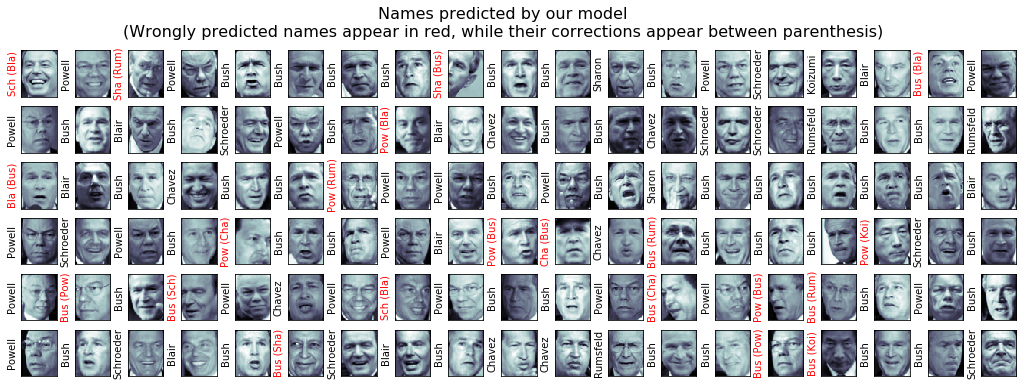

In [182]:
X_test_images = X_test.reshape((X_test.shape[0], 62, 47))

fig, ax = plt.subplots(6, 19, figsize = (18,6))
indexes = np.random.choice(range(y_pred.shape[0]), 6*19, replace = False)
for i, axi in enumerate(ax.flat): # i is the index to place each image in a subplot of this figure
    index = indexes[i] # This is the index to plot a random image from test set in each subplot
    axi.imshow(X_test_images[index], cmap='bone')
    axi.set(xticks=[], yticks=[])
    
    if list(y_pred)[index] == list(y_test)[index]: 
        axi.set_ylabel(label_names[y_pred[index]].split()[-1], color = "black") # if our prediction pairs correctly with 
                                                                                # the data, we colour the name black
    else: 
        real_name = label_names[y_test[index]].split()[-1]
        pred_name = label_names[y_pred[index]].split()[-1]
        axi.set_ylabel("%.3s (%.3s)" % (pred_name, real_name), color = "red") # else we colour it red
plt.suptitle("Names predicted by our model\n(Wrongly predicted names appear in red, while their corrections appear between parenthesis)", fontsize = 16)

Taking a glance at this plot, we see the vast majority of faces are correctly associated to their names. This shows that our model is useful for recognizing the faces of these famous people.